# Time Series Forecasting with ARIMA
This notebook demonstrates time series forecasting using the ARIMA model on NIFTY indices data.


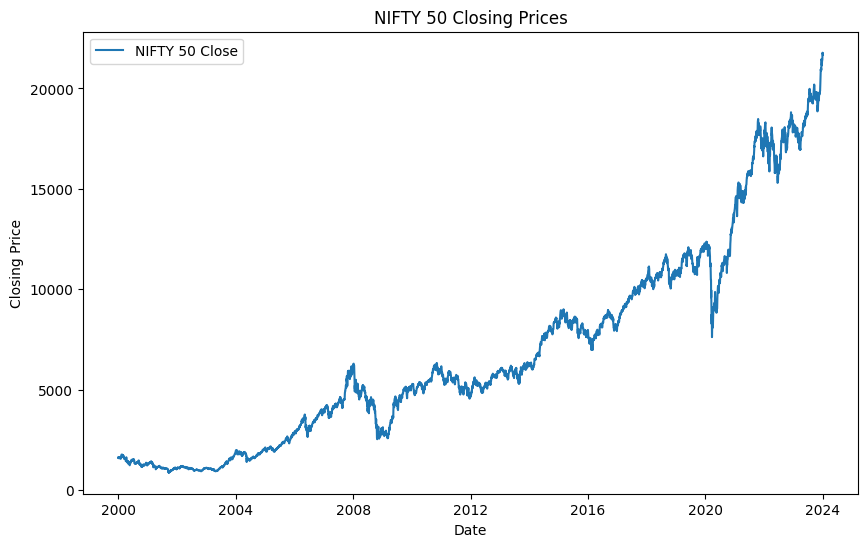

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

nifty_50_df = pd.read_csv('data/NIFTY 50.csv')
nifty_50_df['Date'] = pd.to_datetime(nifty_50_df['Date'])
nifty_50_df.set_index('Date', inplace=True)

# The closing prices plot
plt.figure(figsize=(10, 6))
plt.plot(nifty_50_df['Close'], label='NIFTY 50 Close')
plt.title('NIFTY 50 Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()


ARIMA model

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 4776
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -26459.792
Date:                Mon, 03 Jun 2024   AIC                          52931.585
Time:                        21:15:36   BIC                          52970.412
Sample:                             0   HQIC                         52945.225
                               - 4776                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0711      0.010      7.322      0.000       0.052       0.090
ar.L2         -0.0091      0.010     -0.959      0.337      -0.028       0.010
ar.L3         -0.0084      0.010     -0.847      0.3

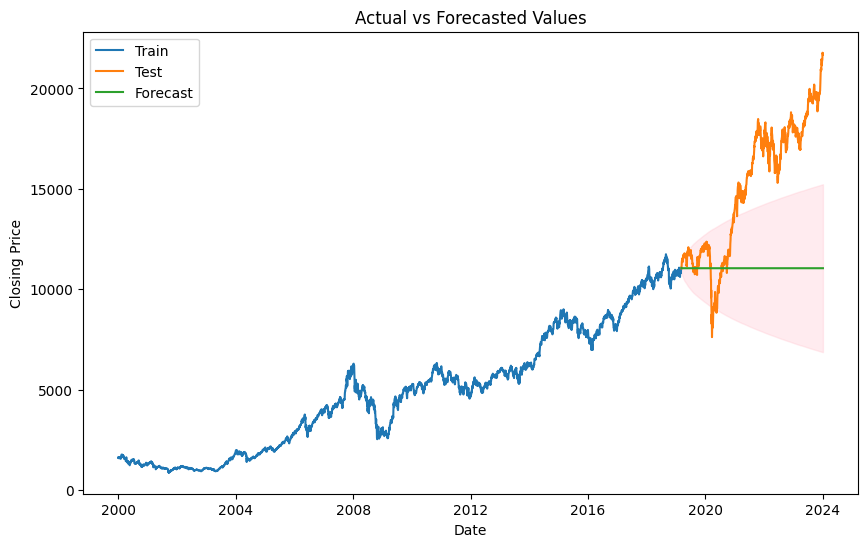

In [8]:
train_size = int(len(nifty_50_df) * 0.8)
train, test = nifty_50_df[:train_size], nifty_50_df[train_size:]

# ARIMA model
model = ARIMA(train['Close'], order=(5, 1, 0))  # (p, d, q) parameters
model_fit = model.fit()
print(model_fit.summary())

forecast = model_fit.forecast(steps=len(test))
conf_int = model_fit.get_forecast(steps=len(test)).conf_int(alpha=0.05)  # 95% conf

# Plotting the actual vs forecasted values
plt.figure(figsize=(10, 6))
plt.plot(train.index, train['Close'], label='Train')
plt.plot(test.index, test['Close'], label='Test')
plt.plot(test.index, forecast, label='Forecast')
plt.fill_between(test.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.title('Actual vs Forecasted Values')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

In [9]:
mse = mean_squared_error(test['Close'], forecast)
rmse = mse ** 0.5
print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 5225.220944101897
